In [1]:
from demo_superpoint import SuperPointFrontend, PointTracker, VideoStreamer
import matplotlib.pyplot as plt
import numpy as np

# Download video

In [2]:
!youtube-dl -f 313 MNn9qKG2UFI

[youtube] MNn9qKG2UFI: Downloading webpage
[youtube] MNn9qKG2UFI: Downloading video info webpage
[youtube] MNn9qKG2UFI: Extracting video information
[download] 4K Traffic camera video - free download now!-MNn9qKG2UFI.webm has already been downloaded
[download] 100% of 659.43MiB


# Setup environment

In [3]:
input = "4K Traffic camera video - free download now!-MNn9qKG2UFI.webm"
height, width = 480, 640
skip = 1
vs = VideoStreamer(input, 0, height, width, skip, '*.png')
fe = SuperPointFrontend(weights_path="superpoint_v1.pth", nms_dist=4, conf_thresh=0.015, nn_thresh=0.7, cuda=True)
tracker = PointTracker(max_length=5, nn_thresh=0.7)

==> Processing Video Input.


# Process couple of frames

In [4]:
frame_count = 20
for i in range(frame_count):
    img, status = vs.next_frame()
    if status is False:
        break
    pts, desc, heatmap = fe.run(img)
    tracker.update(pts, desc)

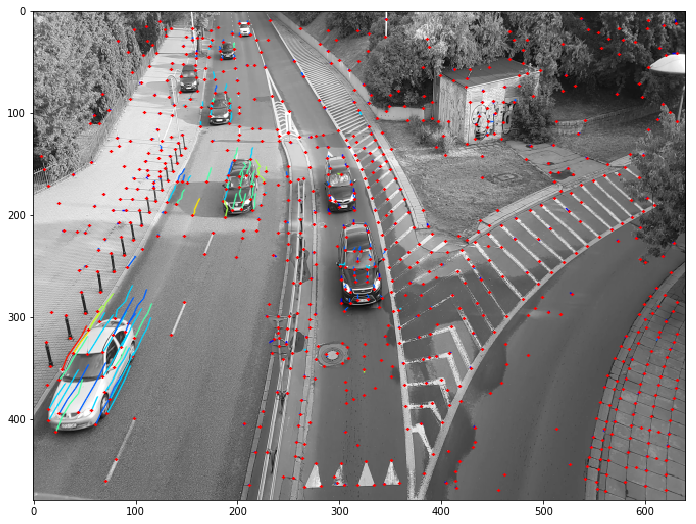

In [5]:
plt.figure(figsize=(16,9))
out1 = (np.dstack((img, img, img)) * 255.).astype('uint8')
frame_copy = out1.copy()
tracks = tracker.get_tracks(min_length=1)
tracks[:, 1] /= float(fe.nn_thresh) # Normalize track scores to [0,1].
tracker.draw_tracks(frame_copy, tracks)
plt.imshow(frame_copy)
plt.show()

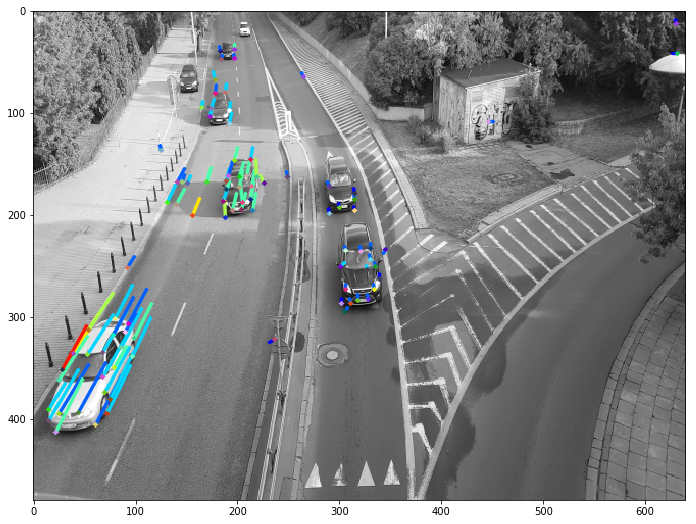

In [6]:
# extract tracks with enough movement
frame_copy = out1.copy()
points = tracker.get_tracklets_with_movement(tracks)
tracker.draw_tracklets(frame_copy, points)
plt.figure(figsize=(16,9))
plt.imshow(frame_copy)
plt.show()